# Pyber Challenge

**Loading and Reading CSV files & import dependencies

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
from matplotlib import style

# File to Load (Remember to change these)
city_data_to_load = ("resources/city_data.csv")
ride_data_to_load = ("resources/ride_data.csv")

#Read the file and make dataframe
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [2]:
city_data_df.head(5)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ride_data_df.head(5)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [4]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [5]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

**Converting date column to datetime index 

In [6]:
ride_data_df['date'] = pd.to_datetime(ride_data_df['date'])

In [7]:
ride_data_df.dtypes

city               object
date       datetime64[ns]
fare              float64
ride_id             int64
dtype: object

**Merge dataframes ride_data_df & city_data_df

In [8]:
#1. Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


**1.The total number of rides for each city type is retrieved

In [9]:
#create a Series of data that has the type of city as the index, then apply the count() method to the "ride_id" column.
type_ride_total_series = pyber_data_df.groupby(["type"]).count()["ride_id"]
type_ride_total_series

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

**2.The total number of drivers for each city type is retrieved.

In [10]:
# create a Series of data that has the type of city as the index, then apply the sum() method to the "driver_count" column. used city data to get driver count
type_driver_total_series = city_data_df.groupby(city_data_df["type"]).sum()["driver_count"]
type_driver_total_series

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

**3.The sum of the fares for each city type is retrieved.

In [11]:
#create a Series of data that has the type of city as the index, then apply the sum() method to the "fare" column.
type_fare_total_series = pyber_data_df.groupby(["type"]).sum()["fare"]
type_fare_total_series

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

**4.The average fare per ride for each city type is calculated. 

In [12]:
# calculate the average fare per ride by city type by dividing the sum of all the fares by the total rides.
Avg_Fare_perride_series= (type_fare_total_series / type_ride_total_series)
Avg_Fare_perride_series

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

**5.The average fare per driver for each city type is calculated. 

In [13]:
#calculate the average fare per driver by city type by dividing the sum of all the fares by the total drivers.
Avg_fare_per_driver_series =type_fare_total_series/type_driver_total_series
Avg_fare_per_driver_series

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [14]:
type_ride_total_series

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

**6.A PyBer summary DataFrame is created.

In [15]:
# create a PyBer summary DataFrame 
pyber_summary_df = pd.DataFrame({"Total rides":type_ride_total_series,
"Total drivers":type_driver_total_series,
"Total fares":type_fare_total_series,
"Average fare per ride":Avg_Fare_perride_series,
"Average fare per driver":Avg_fare_per_driver_series})

#(Pyber_allmetrics)
pyber_summary_df

,Total rides,Total drivers,Total fares,Average fare per ride,Average fare per driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [16]:
# Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total rides,Total drivers,Total fares,Average fare per ride,Average fare per driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


**7.The PyBer summary DataFrame is formatted as shown in the example. 

In [17]:
# 9 . Format the columns.
pyber_summary_df["Total fares"] = pyber_summary_df["Total fares"].map("${:.2f}".format)
pyber_summary_df["Average fare per ride"] = pyber_summary_df["Average fare per ride"].map("${:.2f}".format)
pyber_summary_df["Average fare per driver"] = pyber_summary_df["Average fare per driver"].map("${:.2f}".format)
pyber_summary_df

,Total rides,Total drivers,Total fares,Average fare per ride,Average fare per driver
Rural,125,78,$4327.93,$34.62,$55.49
Suburban,625,490,$19356.33,$30.97,$39.50
Urban,1625,2405,$39854.38,$24.53,$16.57


**1.using the groupby()

In [18]:
# 1. Read the merged DataFrame
pyber_data_df_new = pyber_data_df.groupby(["date","type"]).sum()[["fare"]]
pyber_data_df_new 

,,fare
date,type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:49,Urban,18.45
2019-05-08 07:29:01,Urban,18.55


**2.using the pivot() 

In [19]:
# pyber_data_df_new 
pyber_data_df_new_pivot = pyber_data_df.pivot(index="date", columns="type", values="fare")
pyber_data_df_new_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [20]:
# Check that the datatype for the index is datetime using df.info()
pyber_data_df_new_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


In [21]:
#data frame resample for month
pyber_data_df_new_pivot_month = pyber_data_df_new_pivot.resample("M").sum()
pyber_data_df_new_pivot_month.head()

type,Rural,Suburban,Urban
date,,,
2019-01-31,940.00,4796.08,9054.33
2019-02-28,919.17,4442.70,8875.99
2019-03-31,877.50,4341.99,9845.95
2019-04-30,1332.76,4576.55,9868.02
2019-05-31,258.50,1199.01,2210.09


In [22]:
#data frame resample for year
pyber_data_df_new_pivot_year = pyber_data_df_new_pivot.resample("Y").sum()
pyber_data_df_new_pivot_year

type,Rural,Suburban,Urban
date,,,
2019-12-31,4327.93,19356.33,39854.38


**3.using the loc

In [23]:
#In Step 4, create a new DataFrame by using the loc method on the following date range: 2019-01-01 through 2019-04-28.
start_date ="2019-01-01"
end_date = "2019-04-30"
after_start_date =pyber_data_df["date"]>=start_date
before_end_date = pyber_data_df["date"]<=end_date
data_between_date = after_start_date & before_end_date
date_range = pyber_data_df.loc[data_between_date]
date_range

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2369,Bradshawfurt,2019-01-30 10:55:23,51.39,1328274868072,7,Rural
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural


**4.using the resample()

In [24]:
#data frame resample for year
pyber_data_df_new_pivot_week = pyber_data_df_new_pivot.resample("W").sum()
pyber_data_df_new_pivot_week.head(20)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


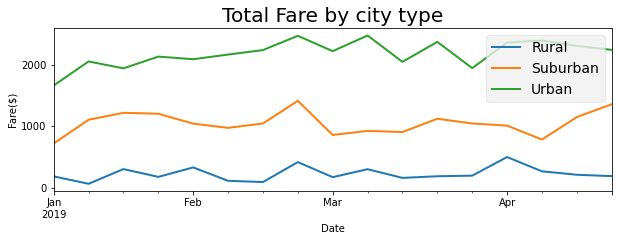

In [25]:
#Line chart matlab
pyber_data_df_new_pivot_week.plot(linewidth=2,figsize=(10, 3))
plt.style.use('fivethirtyeight')
plt.xlabel("Date")
plt.ylabel("Fare($)")
plt.title("Total Fare by city type")
plt.legend(loc="upper right")
plt.xlim("2019-01-06", "2019-04-28")
plt.savefig("resources/finalcartmod5.png")